# LoRa Data Analysis - Algorithm Comparison


We first declare a fixed parameters.

Those parameters are not changed during the experiments.

Fixed communication parameters are listed below:
- Code Rate: 4/5
- Bandwidth: 125 kHz
- Payload length: 12 B

End nodes:
- used an adaptive data rate algorithm (ADR) for communication parameters selection.

Access points:
- two access points were used to avoid a duty cycle depletion

Initial declaration

In [66]:
%matplotlib inline
import pandas as pd # import pandas
import numpy as np # import numpy
import matplotlib as mpl # import matplotlib
import matplotlib_inline as mpl_inl # import matplotlib
import matplotlib.pyplot as plt # import plotting module
import statistics
import math
import base64
from IPython.display import set_matplotlib_formats # module for svg export
from IPython.display import display

mpl_inl.backend_inline.set_matplotlib_formats('svg') # set export to svg file
cut_ratio = 0.05 # Values below 5% of mean value are simply cut from charts to make it more readable
subfolders = ['s1r2', 's2r2', 's3r2']
algorithms = ['adr', 'ucb', 'ts']
colors = ['green', 'blue', 'orange']
output_format = 'png'
uplink_message_files = []
dataset_labels = []
subfolder_str = '-'.join(subfolders) 

%config InlineBackend.figure_format = 'retina'

for alg, subfolder in zip(algorithms, subfolders):
    uplink_message_files.append('./data/' + alg + '/' + subfolder + '/uplink_messages.csv')
    dataset_labels.append(alg.upper())

## Analysis of Uplink Messages

We read a csv file with uplink messages

In [67]:
uplink_data = []

for file in uplink_message_files:
    uplink_data.append(pd.read_csv(file, delimiter=','))

Let us have a look at various columns that are present and can be evaluated.

In [68]:
for index, data in enumerate(uplink_data):
    print(dataset_labels[index])
    display(data.head())

ADR


,id,app_data,snr,rssi,duty_cycle_remaining,is_primary,receive_time,seq,frequency,spf,...,airtime,coderate,bandwidth,msg_group_number,message_type_id,ap_id,node_id,dev_id,application_id,battery
0,39558,QjVCQkJCAA==,8.50,-76,34565,t,2023-09-20 22:45:17.407,44411,866500000,11,...,-1262165414,4/5,125000,169,1,777777,VVVV,39528,NaN,NaN
1,39559,QjVCQkJCAA==,11.75,-59,33619,t,2023-09-20 22:45:20.943,61098,866100000,11,...,-1262161916,4/5,125000,78,1,777777,zMzM,39529,NaN,NaN
2,39560,QjVCQkJCAA==,0.25,-67,32960,t,2023-09-20 22:45:27.476,49316,866900000,12,...,-1262155185,4/5,125000,72,1,777777,iIiI,39530,NaN,NaN
3,39561,QjVCQkJCAA==,9.25,-76,103,t,2023-09-20 22:45:29.922,44413,866300000,11,...,-1262153011,4/5,125000,170,1,333333,VVVV,39531,NaN,NaN
4,39562,QjVCQkJCAA==,10.50,-59,30863,t,2023-09-20 22:45:33.43,61100,866100000,11,...,-1262149489,4/5,125000,79,1,777777,zMzM,39532,NaN,NaN


UCB


,id,app_data,snr,rssi,duty_cycle_remaining,is_primary,receive_time,seq,frequency,spf,...,airtime,coderate,bandwidth,msg_group_number,message_type_id,ap_id,node_id,dev_id,application_id,battery
0,45106,QjVCQkJCAA==,9.50,-84,35,f,2023-09-22 00:00:00.105,622,866100000,7,...,-1171282644,4/7,125000,468,1,333333,d3d3,45076,NaN,NaN
1,45107,QjVCQkJCAA==,9.50,-78,54,t,2023-09-22 00:00:00.107,622,866100000,7,...,-1171282639,4/7,125000,468,1,777777,d3d3,45077,NaN,NaN
2,45108,QjVCQkJCAA==,8.50,-96,35,f,2023-09-22 00:00:14.637,47691,866300000,7,...,-1171267918,4/7,125000,247,1,333333,qqqq,45078,NaN,NaN
3,45109,QjVCQkJCAA==,8.50,-66,54,t,2023-09-22 00:00:14.638,47691,866300000,7,...,-1171267916,4/7,125000,247,1,777777,qqqq,45079,NaN,NaN
4,45110,QjVCQkJCAA==,10.25,-90,54,t,2023-09-22 00:00:18.636,64933,866900000,7,...,-1171264034,4/7,125000,337,1,777777,3d3d,45080,NaN,NaN


TS


,id,app_data,snr,rssi,duty_cycle_remaining,is_primary,receive_time,seq,frequency,spf,...,airtime,coderate,bandwidth,msg_group_number,message_type_id,ap_id,node_id,dev_id,application_id,battery
0,76223,QjVCQkJCAA==,8.00,-109,35262,t,2023-09-27 01:42:59.773,2093,866100000,8,...,-733103188,4/7,125000,4405,1,333333,u7u7,76193,NaN,NaN
1,76224,QjVCQkJCAA==,10.25,-103,35262,t,2023-09-27 01:42:59.823,19450,866100000,8,...,-733102833,4/7,125000,3446,1,333333,mZmZ,76194,NaN,NaN
2,76225,QjVCQkJCAA==,3.75,-112,35262,t,2023-09-27 01:43:00.229,58062,866300000,9,...,-733102450,4/7,125000,2531,1,333333,qqqq,76195,NaN,NaN
3,76226,QjVCQkJCAA==,3.50,-113,34552,t,2023-09-27 01:43:11.277,58064,866300000,9,...,-733091198,4/7,125000,2532,1,333333,qqqq,76196,NaN,NaN
4,76227,QjVCQkJCAA==,11.50,-63,8,f,2023-09-27 01:43:11.279,58064,866300000,9,...,-733091197,4/7,125000,2532,1,777777,qqqq,76197,NaN,NaN


Let us have a look for different values to get an overview of overall values of different network parameters.

In [69]:
for index, data in enumerate(uplink_data):
    print(dataset_labels[index])
    display(data.describe())

ADR


,id,snr,rssi,duty_cycle_remaining,seq,frequency,spf,power,airtime,bandwidth,msg_group_number,message_type_id,ap_id,dev_id,application_id,battery
count,331.000000,331.000000,331.000000,331.000000,331.000000,3.310000e+02,331.000000,331.0,3.310000e+02,331.0,331.000000,331.0,331.000000,331.000000,0.0,0.0
mean,39723.000000,8.570242,-76.111782,11048.000000,32305.921450,8.665097e+08,10.812689,0.0,-1.258056e+09,125000.0,131.861027,1.0,568310.945619,39693.000000,NaN,NaN
std,95.695698,2.969315,11.919028,11522.880097,18305.303426,3.189427e+05,1.582467,0.0,2.934134e+06,0.0,46.706875,0.0,222191.481288,95.695698,NaN,NaN
min,39558.000000,-5.250000,-113.000000,4.000000,1220.000000,8.661000e+08,7.000000,0.0,-1.262165e+09,125000.0,66.000000,1.0,333333.000000,39528.000000,NaN,NaN
25%,39640.500000,7.750000,-81.000000,214.000000,13164.500000,8.663000e+08,10.000000,0.0,-1.261985e+09,125000.0,88.000000,1.0,333333.000000,39610.500000,NaN,NaN
50%,39723.000000,9.000000,-77.000000,7087.000000,33256.000000,8.665000e+08,11.000000,0.0,-1.258391e+09,125000.0,106.000000,1.0,777777.000000,39693.000000,NaN,NaN
75%,39805.500000,10.250000,-69.500000,19480.000000,49467.000000,8.669000e+08,12.000000,0.0,-1.254871e+09,125000.0,176.000000,1.0,777777.000000,39775.500000,NaN,NaN
max,39888.000000,13.750000,-53.000000,35713.000000,65367.000000,8.669000e+08,12.000000,0.0,-1.254712e+09,125000.0,216.000000,1.0,777777.000000,39858.000000,NaN,NaN


UCB


,id,snr,rssi,duty_cycle_remaining,seq,frequency,spf,power,airtime,bandwidth,msg_group_number,message_type_id,ap_id,dev_id,application_id,battery
count,1579.000000,1579.00000,1579.000000,1579.000000,1579.000000,1.579000e+03,1579.000000,1579.0,1.579000e+03,1579.0,1579.000000,1579.0,1579.000000,1579.000000,0.0,0.0
mean,45895.000000,10.34088,-82.962635,13771.659911,29258.119063,8.662724e+08,8.671311,0.0,-1.164644e+09,125000.0,712.164661,1.0,556540.151362,45865.000000,NaN,NaN
std,455.962352,2.93189,12.901273,11663.856943,20870.235375,2.593695e+05,1.406217,0.0,3.038085e+06,0.0,224.086702,0.0,222290.217014,455.962352,NaN,NaN
min,45106.000000,-16.00000,-103.000000,10.000000,622.000000,8.661000e+08,7.000000,0.0,-1.171283e+09,125000.0,247.000000,1.0,333333.000000,45076.000000,NaN,NaN
25%,45500.500000,9.50000,-93.000000,1766.500000,9865.500000,8.661000e+08,8.000000,0.0,-1.167901e+09,125000.0,555.000000,1.0,333333.000000,45470.500000,NaN,NaN
50%,45895.000000,10.75000,-84.000000,12550.000000,20373.000000,8.661000e+08,8.000000,0.0,-1.164496e+09,125000.0,732.000000,1.0,777777.000000,45865.000000,NaN,NaN
75%,46289.500000,11.75000,-79.000000,23873.000000,50199.000000,8.663000e+08,9.000000,0.0,-1.161128e+09,125000.0,901.500000,1.0,777777.000000,46259.500000,NaN,NaN
max,46684.000000,14.25000,-54.000000,36000.000000,65090.000000,8.669000e+08,11.000000,0.0,-1.160483e+09,125000.0,1095.000000,1.0,777777.000000,46654.000000,NaN,NaN


TS


,id,snr,rssi,duty_cycle_remaining,seq,frequency,spf,power,airtime,bandwidth,msg_group_number,message_type_id,ap_id,dev_id,application_id,battery
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1.869000e+03,1869.000000,1869.0,1.869000e+03,1869.0,1869.000000,1869.0,1869.000000,1869.000000,0.0,0.0
mean,77157.000000,9.077448,-84.762975,9024.579454,35148.878545,8.664671e+08,8.660781,0.0,-7.290698e+08,125000.0,3030.097378,1.0,533558.707865,77127.000000,NaN,NaN
std,539.678145,3.828967,16.882641,10956.350277,18248.548499,2.657692e+05,1.024574,0.0,2.976252e+06,0.0,696.923538,0.0,221189.867520,539.678145,NaN,NaN
min,76223.000000,-11.000000,-115.000000,4.000000,1165.000000,8.661000e+08,7.000000,0.0,-7.331032e+08,125000.0,1936.000000,1.0,333333.000000,76193.000000,NaN,NaN
25%,76690.000000,8.500000,-99.000000,38.000000,21036.000000,8.663000e+08,8.000000,0.0,-7.324934e+08,125000.0,2609.000000,1.0,333333.000000,76660.000000,NaN,NaN
50%,77157.000000,10.250000,-81.000000,2010.000000,35367.000000,8.665000e+08,8.000000,0.0,-7.290870e+08,125000.0,2744.000000,1.0,333333.000000,77127.000000,NaN,NaN
75%,77624.000000,11.750000,-71.000000,17018.000000,52341.000000,8.667000e+08,10.000000,0.0,-7.257559e+08,125000.0,3493.000000,1.0,777777.000000,77594.000000,NaN,NaN
max,78091.000000,23.250000,-55.000000,35466.000000,65197.000000,8.669000e+08,10.000000,0.0,-7.249259e+08,125000.0,4581.000000,1.0,777777.000000,78061.000000,NaN,NaN


### Picking up only Unique Uplink Messages

In [70]:
unique_messages = []

for index, data in enumerate(uplink_data):
    unique_messages.append(data[data.is_primary=="t"])
    print(f'Uplink messages received during {dataset_labels[index]} experiment: {len(unique_messages[index])}')

Uplink messages received during ADR experiment: 283
Uplink messages received during UCB experiment: 925
Uplink messages received during TS experiment: 1247


### Spreading Factor

In [71]:
sfs = []

for index, data in enumerate(unique_messages):
    sfs.append(data.spf.value_counts())

# Find the union of all columns in all datasets
all_columns = set().union(*(df.index for df in sfs))

# Create a dictionary of DataFrames with the same columns for all datasets
datasets_dict = {}
for idx, df in enumerate(sfs):
    # Fill missing columns with 0
    df = df.reindex(all_columns, fill_value=0)
    datasets_dict[dataset_labels[idx]] = df

# Convert the dictionary to a list of pairs (DataFrame, label)
results = [(df, label) for label, df in datasets_dict.items()]

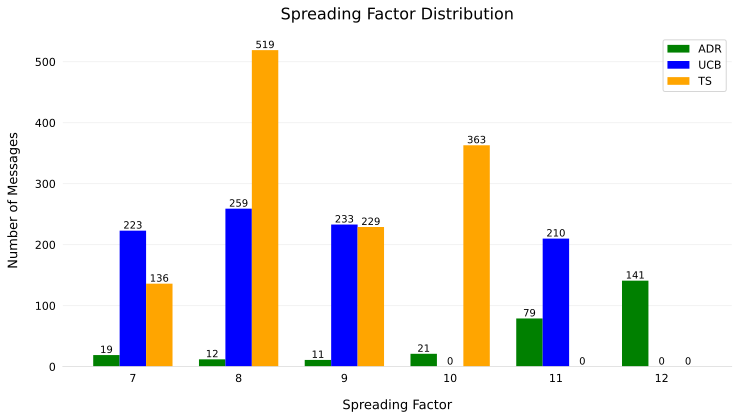

In [72]:
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width.
bar_width = 1 / (len(algorithms) + 1)
index = np.arange(len(results[0][0].index))

for idx, (data, label) in enumerate(results):
    # Drop NA values before calculations
    data_cleaned = data.dropna()
    
    ax.bar(index + idx * bar_width, data_cleaned, width=bar_width, label=label, color=colors[idx])

# Set x-ticks and labels
ax.set_xticks(index + bar_width * (len(results) - 1) / 2)
ax.set_xticklabels(results[0][0].index)

# Add a legend
ax.legend()

# Axis styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels
ax.set_xlabel('Spreading Factor', labelpad=15)
ax.set_ylabel('Number of Messages', labelpad=15)
ax.set_title('Spreading Factor Distribution', pad=15)

# For each bar in the chart, add a text label
for bar in ax.patches:
    bar_value = round(bar.get_height())
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=10)

filename = f'algorithms-sf-{subfolder_str}.{output_format}'
fig.savefig(filename, dpi=300)

plt.show()

### Utilization of Frequency

Frequency is stored in Hz, so we need to convert it to MHz.

In [73]:
cfs = []

for index, data in enumerate(unique_messages):
    cfs.append(data.frequency.value_counts())

# Find the union of all columns in all datasets
all_columns = set().union(*(df.index for df in cfs))

# Create a dictionary of DataFrames with the same columns for all datasets
datasets_dict = {}
for idx, df in enumerate(cfs):
    # Fill missing columns with 0
    df = df.reindex(all_columns, fill_value=0)
    datasets_dict[dataset_labels[idx]] = df

# Convert the dictionary to a list of pairs (DataFrame, label)
results = [(df, label) for label, df in datasets_dict.items()]

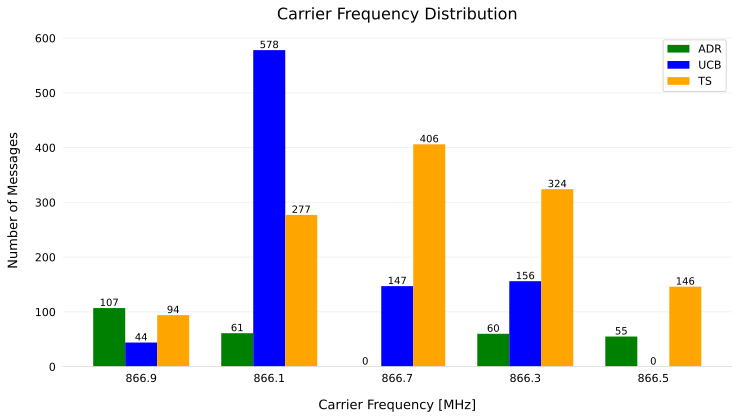

In [74]:
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width.
bar_width = 1 / (len(algorithms) + 1)
index = np.arange(len(results[0][0].index))

for idx, (data, label) in enumerate(results):
    # Drop NA values before calculations
    data_cleaned = data.dropna()
    
    ax.bar(index + idx * bar_width, data_cleaned, width=bar_width, label=label, color=colors[idx])

# Set x-ticks and labels
ax.set_xticks(index + bar_width * (len(results) - 1) / 2)
ax.set_xticklabels(results[0][0].index / 1000000)

# Add a legend
ax.legend()

# Axis styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels
ax.set_xlabel('Carrier Frequency [MHz]', labelpad=15)
ax.set_ylabel('Number of Messages', labelpad=15)
ax.set_title('Carrier Frequency Distribution', pad=15)

# For each bar in the chart, add a text label
for bar in ax.patches:
    bar_value = round(bar.get_height())
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=10)

filename = f'algorithms-cf-{subfolder_str}.{output_format}'
fig.savefig(filename, dpi=300)

plt.show()

### Number of Unique Message per End Nodes

In [75]:
message_counts = []
unique_message_counts = []
recommended_messages = 154

for idx, data in enumerate(unique_messages):
    message_counts.append(data.node_id.value_counts().reset_index())
    message_counts[idx].columns = ['node_id', dataset_labels[idx]]

node_id_column = message_counts[0]['node_id']

result = pd.concat([node_id_column] + [df.drop('node_id', axis=1) for df in message_counts], axis=1)
result = result.fillna(0)

for label in dataset_labels:
    result[f'PDR ({label})'] = round((result[label] / recommended_messages) * 100, 2)

print(result)

  node_id   ADR    UCB   TS  PDR (ADR)  PDR (UCB)  PDR (TS)
0    VVVV  48.0  259.0  229      31.17     168.18    148.70
1    ZmZm  44.0  233.0  206      28.57     151.30    133.77
2    d3d3  42.0  210.0  177      27.27     136.36    114.94
3    iIiI  35.0   44.0  172      22.73      28.57    111.69
4    3d3d  32.0   41.0  162      20.78      26.62    105.19
5    zMzM  29.0   36.0  118      18.83      23.38     76.62
6    7u7u  27.0   35.0   92      17.53      22.73     59.74
7    u7u7  26.0   34.0   38      16.88      22.08     24.68
8       0   0.0   33.0   29       0.00      21.43     18.83
9       0   0.0    0.0   24       0.00       0.00     15.58


In [76]:
for label in dataset_labels:
    mean_value = round(result[f'PDR ({label})'].mean(), 2)
    print(f'Mean PDR for {label} is {mean_value}%')

Mean PDR for ADR is 18.38%
Mean PDR for UCB is 60.06%
Mean PDR for TS is 80.97%


Convert the table to LaTeX

In [77]:
num_columns = len(result.columns)
column_format = '| X ' * (num_columns - 1) + '| X |'
latex_code = result.to_latex(index=False, column_format=column_format)
print(latex_code)

\begin{tabular}{| X | X | X | X | X | X | X |}
\toprule
node_id & ADR & UCB & TS & PDR (ADR) & PDR (UCB) & PDR (TS) \\
\midrule
VVVV & 48.000000 & 259.000000 & 229 & 31.170000 & 168.180000 & 148.700000 \\
ZmZm & 44.000000 & 233.000000 & 206 & 28.570000 & 151.300000 & 133.770000 \\
d3d3 & 42.000000 & 210.000000 & 177 & 27.270000 & 136.360000 & 114.940000 \\
iIiI & 35.000000 & 44.000000 & 172 & 22.730000 & 28.570000 & 111.690000 \\
3d3d & 32.000000 & 41.000000 & 162 & 20.780000 & 26.620000 & 105.190000 \\
zMzM & 29.000000 & 36.000000 & 118 & 18.830000 & 23.380000 & 76.620000 \\
7u7u & 27.000000 & 35.000000 & 92 & 17.530000 & 22.730000 & 59.740000 \\
u7u7 & 26.000000 & 34.000000 & 38 & 16.880000 & 22.080000 & 24.680000 \\
0 & 0.000000 & 33.000000 & 29 & 0.000000 & 21.430000 & 18.830000 \\
0 & 0.000000 & 0.000000 & 24 & 0.000000 & 0.000000 & 15.580000 \\
\bottomrule
\end{tabular}



### Comparison of Approaches Accross Rounds

Common settings for all the charts.

In [ ]:
plt.rcParams.update({
    "figure.dpi": 200,
    "savefig.dpi": 300,
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})

rounds = range(1, 6)

labels = {
    "S_ADR_A": "ADR",
    "S_UCB_C": "UCB",
    "S_TS_C":  "TS",
    "M_TS_A":  "TS ALOHA",
    "M_TS_C":  "TS CAD",
}

colors = { 
    "S_ADR_A": "green", 
    "S_UCB_C": "blue", 
    "S_TS_C": "orange", 
    "M_TS_A": "red", 
    "M_TS_C": "orange" 
}

markers = { 
    "S_ADR_A": "o", 
    "S_UCB_C": "s", 
    "S_TS_C": "D", 
    "M_TS_A": "^", 
    "M_TS_C": "v" 
}

linestyles = { 
    "S_ADR_A": "-", 
    "S_UCB_C": "-", 
    "S_TS_C": "-", 
    "M_TS_A": "--", 
    "M_TS_C": "--" 
}

lw = 2.2
ms = 7
mew = 1.2

Mean Packet Delivery Ratio by Approach Across Rounds

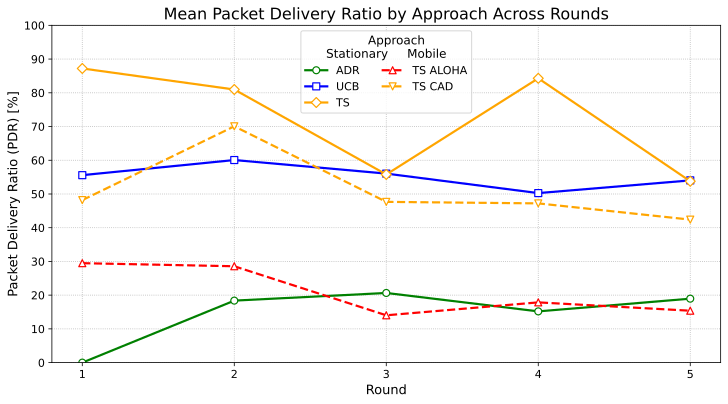

In [80]:
data = {
    "S_ADR_A": [0, 18.38, 20.65, 15.19, 18.96],
    "S_UCB_C": [55.58, 60.06, 56.04, 50.26, 54.03],
    "S_TS_C":  [87.21, 80.97, 55.78, 84.29, 53.77],
    "M_TS_A":  [29.48, 28.57, 14.03, 17.86, 15.39],
    "M_TS_C":  [48.18, 70.06, 47.66, 47.21, 42.40],
}

plt.figure(figsize=(10, 5.5), constrained_layout=True)

for name, vals in data.items():
    plt.plot(
        rounds, vals,
        marker=markers[name],
        linestyle=linestyles[name],
        color=colors[name],
        linewidth=lw,
        markersize=ms,
        markeredgewidth=mew,
        markerfacecolor="white",
        label=labels[name]
    )

plt.title("Mean Packet Delivery Ratio by Approach Across Rounds")
plt.xlabel("Round")
plt.ylabel("Packet Delivery Ratio (PDR) [%]")
plt.xticks(list(rounds), [f"{i}" for i in rounds])
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))
plt.grid(True, linestyle=":", linewidth=0.8)
plt.legend(title="           Approach\nStationary     Mobile", ncol=2, frameon=True)

plt.savefig(f'pdr-across-rounds.{output_format}', dpi=300, bbox_inches="tight")
plt.show()

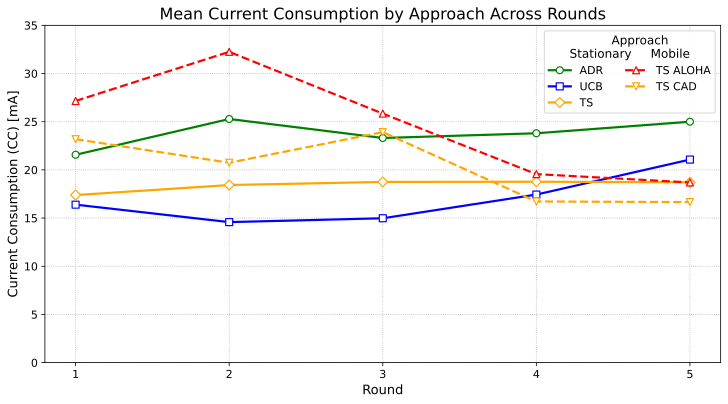

In [86]:
data = {
    "S_ADR_A": [21.57, 25.28, 23.31, 23.80, 25.00],
    "S_UCB_C": [16.39, 14.58, 14.98, 17.44, 21.07],
    "S_TS_C":  [17.39, 18.43, 18.75, 18.77, 18.71],
    "M_TS_A":  [27.15, 32.25, 25.84, 19.56, 18.70],
    "M_TS_C":  [23.19, 20.74, 23.92, 16.72, 16.66],
}

plt.figure(figsize=(10, 5.5), constrained_layout=True)

for name, vals in data.items():
    plt.plot(
        rounds, vals,
        marker=markers[name],
        linestyle=linestyles[name],
        color=colors[name],
        linewidth=lw,
        markersize=ms,
        markeredgewidth=mew,
        markerfacecolor="white",
        label=labels[name]
    )

plt.title("Mean Current Consumption by Approach Across Rounds")
plt.xlabel("Round")
plt.ylabel("Current Consumption (CC) [mA]")
plt.xticks(list(rounds), [f"{i}" for i in rounds])
plt.ylim(0, 35)
plt.yticks(range(0, 36, 5))
plt.grid(True, linestyle=":", linewidth=0.8)
plt.legend(title="           Approach\nStationary     Mobile", ncol=2, frameon=True)

plt.savefig(f'cc-across-rounds.{output_format}', dpi=300, bbox_inches="tight")
plt.show()

Export LaTeX to file.

In [19]:
#file_path = f'message-count-{subfolder_str}.tex'

#with open(file_path, 'w') as file:
#    file.write(latex_code)

#print(f'The LaTeX table has been saved to {file_path}')

The End.